# Análisis Exploratorio de Datos (EDA)


El propósito de este EDA es realizar la limpieza/preparación/transformación de datos que finalmente se utilizará en un algoritmo de aprendizaje automático. Procederemos de la siguiente manera:

<img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" />

[Source](http://sharpsightlabs.com/blog/data-analysis-machine-learning-example-1/)

## Preparación

Para los preparativos, primero importemos las bibliotecas necesarias y carguemos los archivos necesarios para nuestro EDA.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comente esto si las visualizaciones de datos no funcionan de su lado
%matplotlib inline

plt.style.use('bmh')

In [5]:
!wget https://github.com/ichaparroc/house-prices/blob/master/house-prices-advanced-regression-techniques.zip?raw=true

--2020-11-23 22:32:00--  https://github.com/ichaparroc/house-prices/blob/master/house-prices-advanced-regression-techniques.zip?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ichaparroc/house-prices/raw/master/house-prices-advanced-regression-techniques.zip [following]
--2020-11-23 22:32:00--  https://github.com/ichaparroc/house-prices/raw/master/house-prices-advanced-regression-techniques.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ichaparroc/house-prices/master/house-prices-advanced-regression-techniques.zip [following]
--2020-11-23 22:32:00--  https://raw.githubusercontent.com/ichaparroc/house-prices/master/house-prices-advanced-regression-techniques.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.1

In [7]:
!unzip /content/house-prices-advanced-regression-techniques.zip?raw=true

Archive:  /content/house-prices-advanced-regression-techniques.zip?raw=true
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
!ls

 data_description.txt
'house-prices-advanced-regression-techniques.zip?raw=true'
'house-prices-advanced-regression-techniques.zip?raw=true.1'
'house-prices-advanced-regression-techniques.zip?raw=true.2'
'house-prices-advanced-regression-techniques.zip?raw=true.3'
 sample_data
 sample_submission.csv
 test.csv
 train.csv


In [9]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

A partir de esta información, ya podemos ver que algunas características no serán relevantes en nuestro análisis exploratorio, ya que faltan demasiados valores (como `Alley` o callejón de acceso y `PoolQC` o calidad de piscina). 
Puede consultar la descripción de las características en el archivo data_description.txt.
Además, hay tantas características para analizar que puede ser mejor concentrarse en las que pueden brindarnos información real. Simplemente eliminemos "Id" y las características con valores de "NaN" (Not a Number) del 30% o menos.

In [ ]:
# df.count() no incluye valores NaN
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



Nota: Si tomamos las características que acabamos de eliminar y miramos su descripción en el archivo `data_description.txt`, podemos deducir que estas características pueden no estar presentes en todas las casas (lo que explica los valores de `NaN`). En nuestro próximo cuaderno de preparación / limpieza de datos, podríamos transformarlos en valores ficticios categóricos.

Ahora echemos un vistazo a cómo se distribuye el precio de la vivienda.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


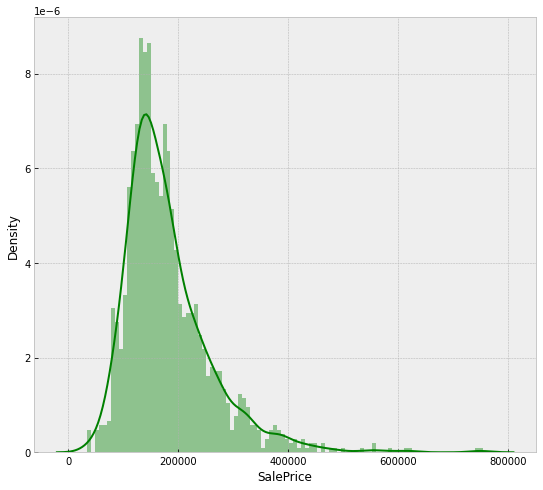

In [10]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Con esta información podemos ver que los precios están sesgados a la derecha y algunos valores atípicos se encuentran por encima de ~500.000. Eventualmente, querremos deshacernos de ellos para obtener una distribución normal de la variable independiente (`SalePrice`) para el machine learning.

## Distribución de datos numéricos

Para esta parte, veamos la distribución de todas las características graficándolas

Para hacerlo, primero enumeremos todos los tipos de nuestros datos de nuestro conjunto de datos y tomemos solo los numéricos:

In [11]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Ahora grafiquemos todos:

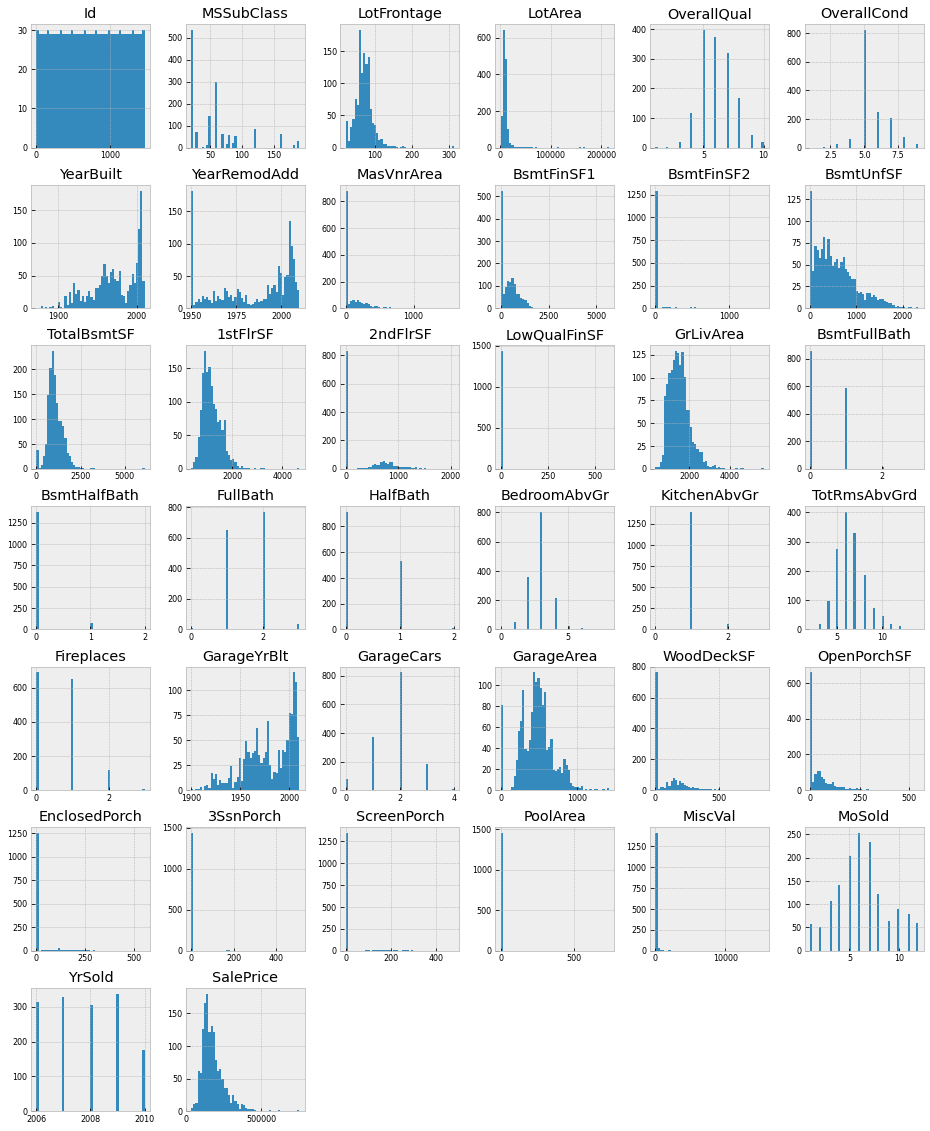

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ";" evitar tener la información detallada de matplotlib

Características como `1stFlrSF`,` TotalBsmtSF`, `LotFrontage`,` GrLiveArea` ... parecen compartir una distribución similar a la que tenemos con `SalePrice`. Veamos si podemos encontrar nuevas pistas más tarde.

#### Correlación

Ahora intentaremos encontrar qué características están fuertemente correlacionadas con `SalePrice`. Los almacenaremos en una variable llamada `golden_features_list`. Reutilizaremos nuestro conjunto de datos `df_num` para hacerlo.

In [19]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # "-1" porque la última fila es SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Hay {} valores fuertemente correlacionados con SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

Hay 10 valores fuertemente correlacionados con SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Perfecto, ahora tenemos una lista de valores fuertemente correlacionados, pero esta lista está incompleta porque sabemos que la correlación se ve afectada por valores atípicos. Entonces podríamos proceder de la siguiente manera:

- Graficar las características numéricas y vea cuáles tienen muy pocos valores atípicos explicables.
- Eliminar los valores atípicos de estas características y vea cuál puede tener una buena correlación sin sus valores atípicos.
    
Por cierto, la correlación por sí sola no siempre explica la relación entre los datos, por lo que graficarlos podría incluso llevarnos a nuevos conocimientos y, de la misma manera, verificar que nuestros valores correlacionados tengan una relación lineal con el `SalePrice`.

Por ejemplo, relaciones como la relación curvilínea no se pueden adivinar con solo mirar el valor de correlación, así que tomemos las características que excluimos de nuestra tabla de correlación y grafiquemos para ver si muestran algún tipo de patrón.

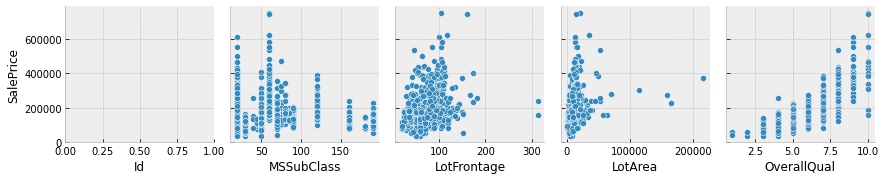

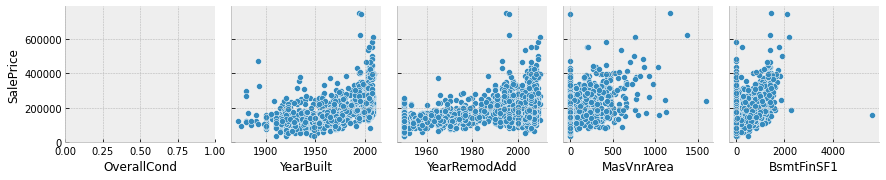

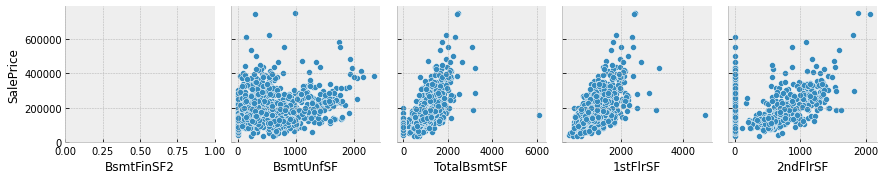

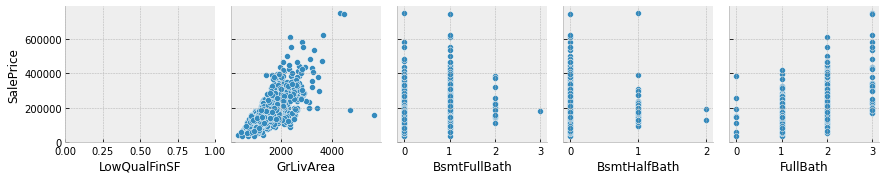

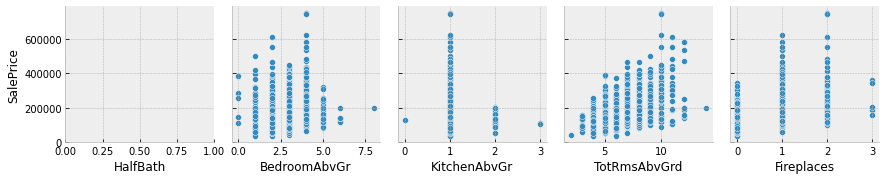

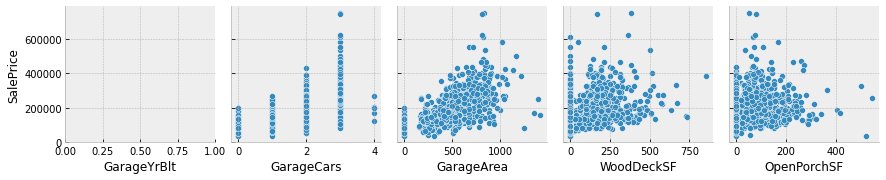

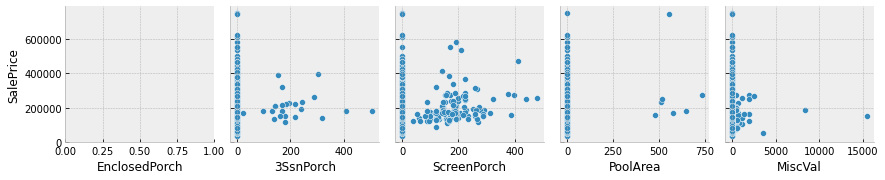

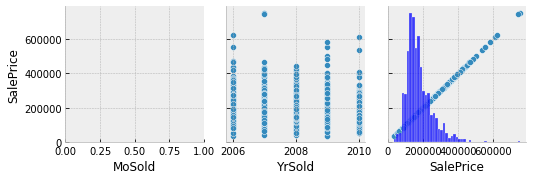

In [20]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

Podemos identificar claramente algunas relaciones. La mayoría de ellos parece tener una relación lineal con el `SalePrice` y si miramos de cerca los datos, podemos ver que muchos puntos de datos están ubicados en `x = 0`, lo que puede indicar la ausencia de dicha característica en la casa.

Por ejemplo `OpenPorchSF`, dudo que todas las casas tengan un porche.

Así que ahora eliminemos estos valores `0` y repitamos el proceso de encontrar valores correlacionados:

In [21]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
             Id: -0.021916719443431112
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113

¡Muy interesante! Encontramos otro valor fuertemente correlacionado limpiando un poco los datos. Ahora nuestra variable `golden_features_list` se ve así:

In [18]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


Encontramos predictores fuertemente correlacionados con "SalePrice". Más tarde, con la ingeniería de características, podemos agregar valores "dummy" (0 o 1) donde el valor de una característica dada >0 sería 1 (precedencia de dicha característica) y 0 sería 0.
Para `2ndFlrSF`, por ejemplo, podríamos crear un valor ficticio para su precienso o no precenso y finalmente sumarlo a `1stFlrSF`.

### Conclusión

Al observar la correlación entre valores numéricos, descubrimos 11 características que tienen una fuerte relación con el precio de la vivienda. Además de la correlación, no encontramos ningún patrón notable en los datos que no estén correlacionados.

## Relación característica a característica

Tratar de trazar todas las características numéricas en un diagrama de pares de "seaborn" nos llevará demasiado tiempo y será difícil de interpretar. Podemos intentar ver si algunas variables están vinculadas entre sí y luego explicar su relación con el sentido común.

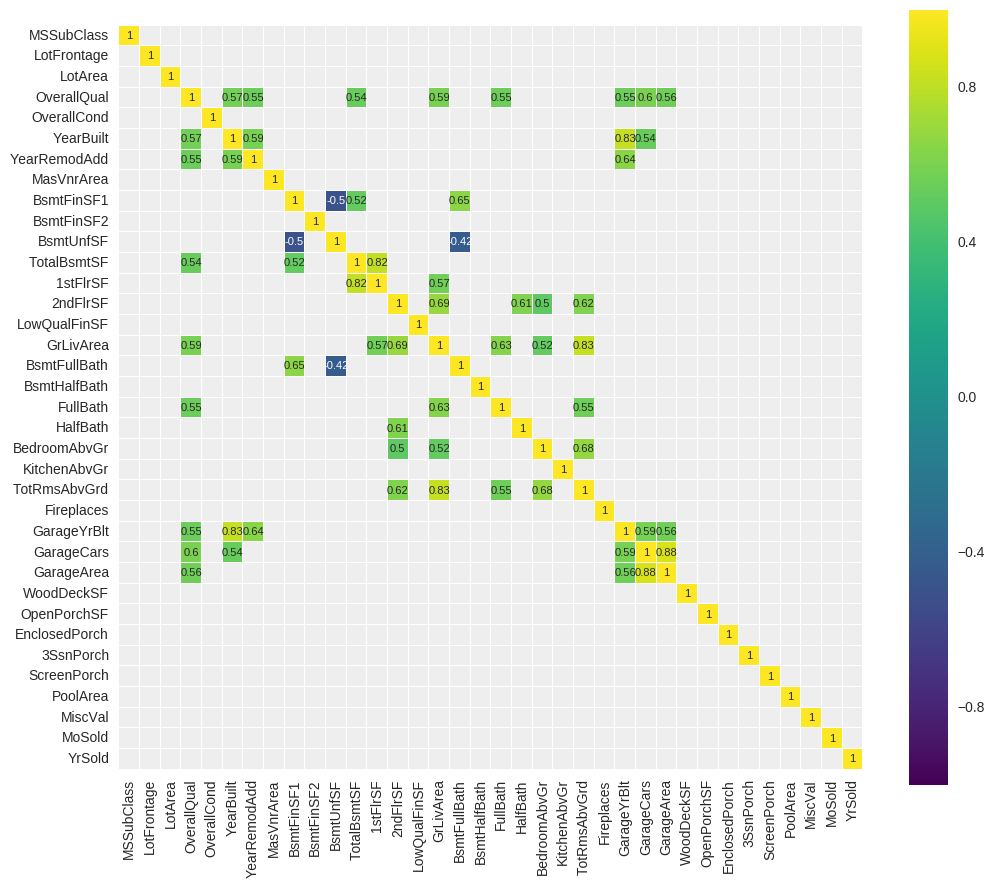

In [ ]:
corr = df_num.drop('SalePrice', axis=1).corr() # Ya examinamos las correlaciones de SalePrice
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Muchas características parecen estar correlacionadas entre sí, pero algunas de ellas, como `YearBuild`/`GarageYrBlt` pueden indicar una inflación de precios a lo largo de los años. En cuanto a `1stFlrSF`/`TotalBsmtSF`, es normal que cuanto más grande sea el primer piso (considerando que muchas casas tienen solo 1 piso), más grande será el sótano total.

Ahora, para los que son menos obvios, podemos ver que:
- Existe una fuerte correlación negativa entre `BsmtUnfSF` (pies cuadrados sin terminar de área del sótano) y` BsmtFinSF2` (pies cuadrados terminados Tipo 2).
- `HalfBath`/`2ndFlrSF` es interesante y puede indicar que la gente da la importancia de no tener que bajar corriendo las escaleras en caso de tener que ir al baño urgentemente.

Podemos concluir que, en esencia, algunas de esas características pueden combinarse entre sí para reducir la cantidad de características (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`) y otras indican que la gente espera múltiples características para ser empaquetadas juntas.

## Q -> Q (Relación cuantitativa a cuantitativa)

Examinemos ahora las características cuantitativas de nuestro marco de datos y cómo se relacionan con el `SalePrice`, que también es cuantitativo (de ahí la relación Q -> Q).

Algunas de las características de nuestro conjunto de datos son categóricas. Para separar las características categóricas de las cuantitativas, consulte el archivo `data_description.txt`. De acuerdo con este archivo, terminamos con las siguientes columnas:

In [22]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000


Aún así, tenemos muchas características para analizar aquí, así que tomemos las características *cuantitativas fuertemente correlacionadas* de este conjunto de datos y analicémoslas una por una.

In [23]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Veamos su distribución.

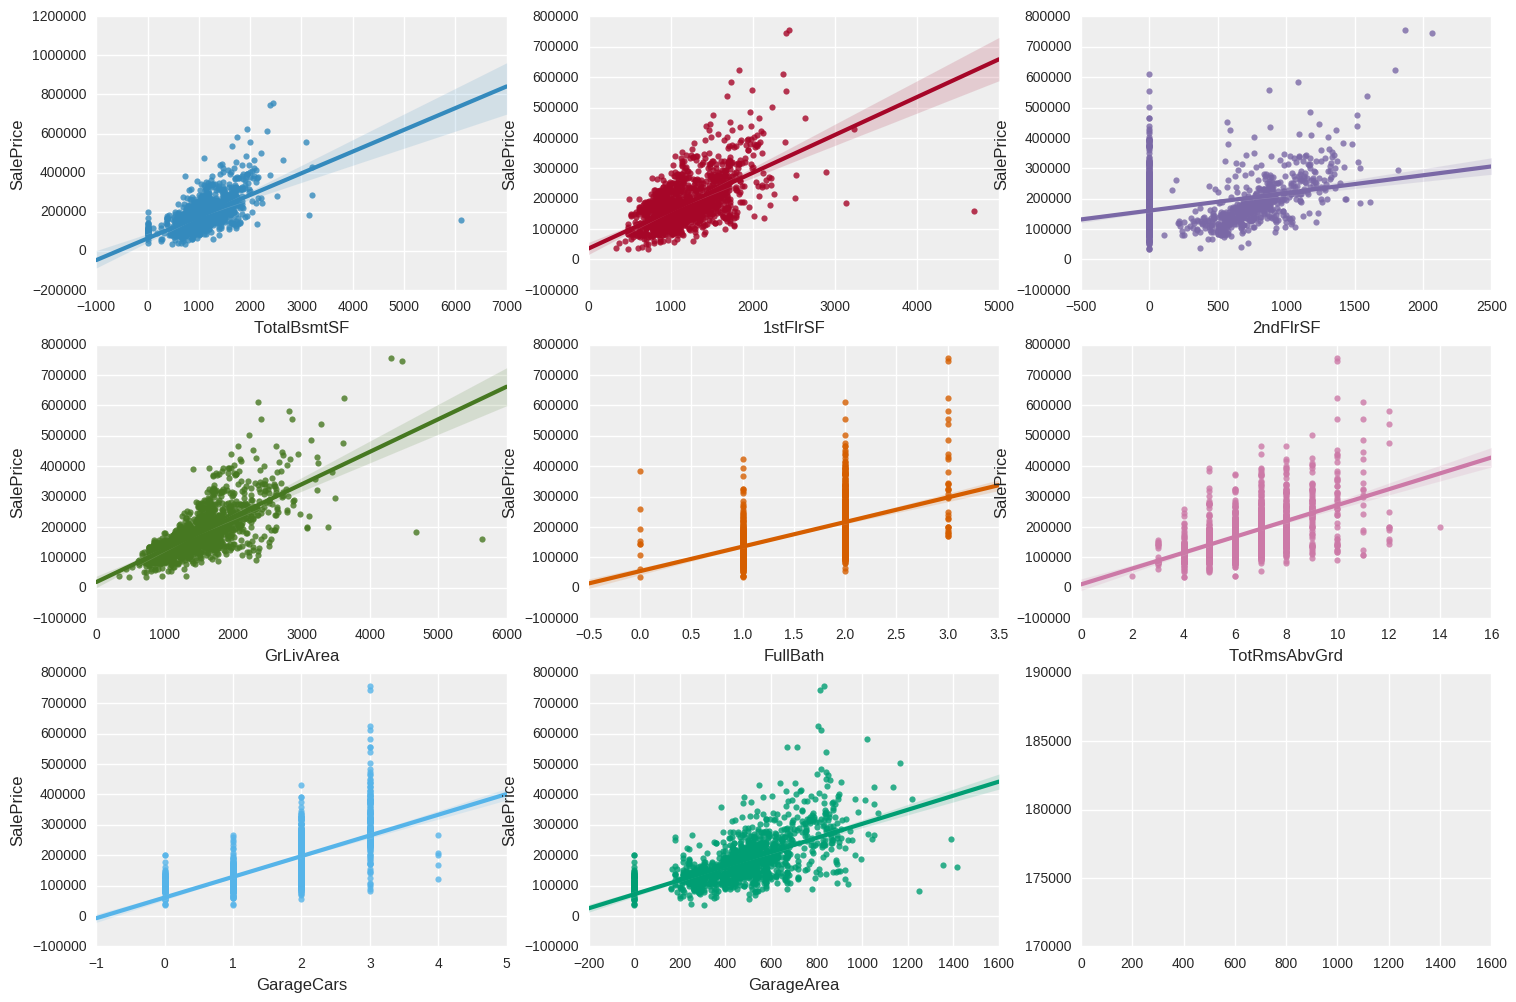

In [ ]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

Podemos ver que características como `TotalBsmtSF`, `1stFlrSF`, `GrLivArea` tienen una gran difusión, pero no puedo decir qué información nos brinda esta información.

## C -> Q (Relación categórica a cuantitativa)

Obtengamos todas las características categóricas de nuestro conjunto de datos y veamos si podemos encontrar algo de información en ellas.
En lugar de volver a abrir nuestro archivo `data_description.txt` y verificar qué datos son categóricos, eliminemos` quantitative_features_list` de todo nuestro marco de datos.

In [24]:
# quantitative_features_list[:-1] Como la última columna es SalePrice y queremos mantenerla
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,2003.0,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal,250000


Y no olvide las características no numéricas

In [25]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('Hay {} características no numéricas que incluyen:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

Hay 43 características no numéricas que incluyen:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Al observar estas características, podemos ver que muchas de ellas son del tipo `Objeto (O)`. En nuestro cuaderno de transformación de datos, podríamos usar [Funciones categóricas de Pandas] (http://pandas.pydata.org/pandas-docs/stable/categorical.html) (equivalente al factor R) para dar forma a nuestros datos de una manera que sería interpretable para nuestro algoritmo de aprendizaje automático. `ExterQual` por ejemplo podría transformarse en un objeto categórico ordenado.

Ahora tracemos algunos de ellos.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

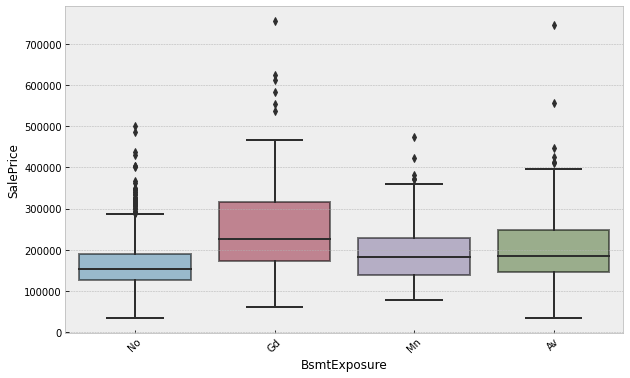

In [26]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

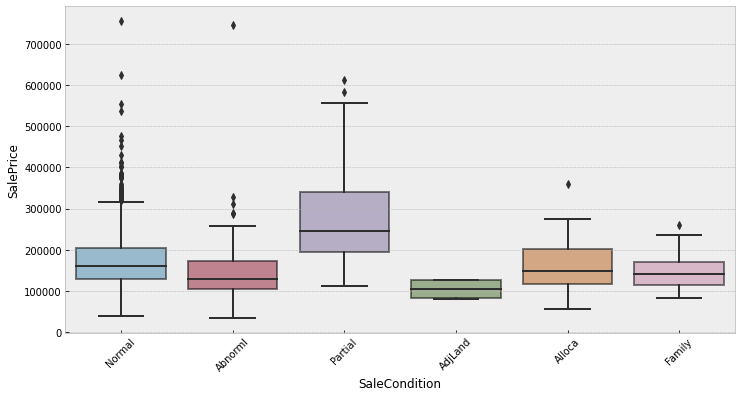

In [27]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

Y finalmente veamos su distribución.

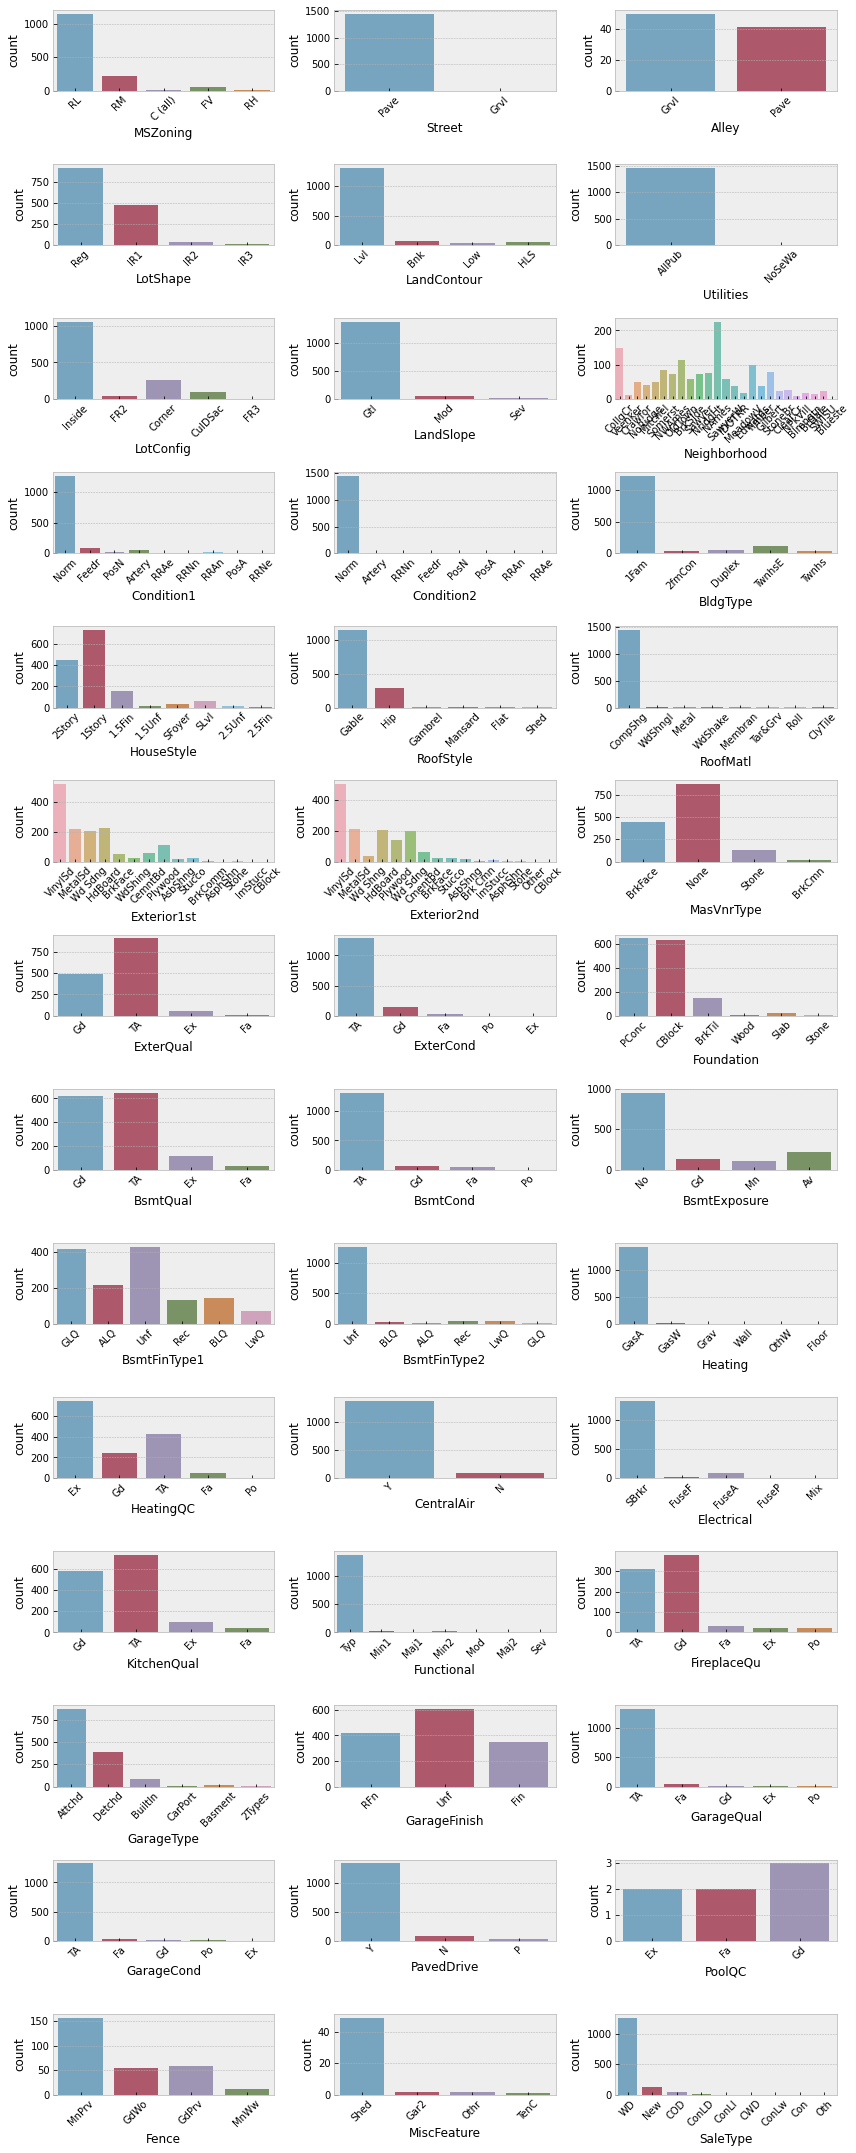

In [28]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

Podemos ver que algunas categorías son predominantes para algunas características como "Utilidades", "Calefacción", "GarageCond", "Funcional" ... Estas características pueden no ser relevantes para nuestro modelo predictivo.